In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [ ]:
data = pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data['Albumin_and_Globulin_Ratio']

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64

In [ ]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio']
data['Albumin_and_Globulin_Ratio']= data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Gender'] = lc.fit_transform(data['Gender'])


In [ ]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<ipython-input-12-a9533a3b6a8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


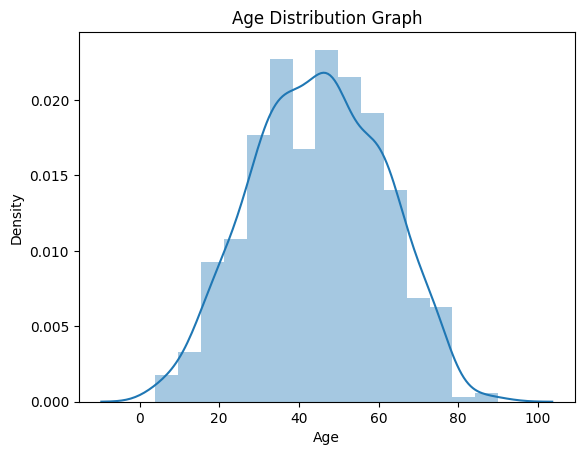

In [ ]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

<Axes: xlabel='Total_Protiens', ylabel='count'>

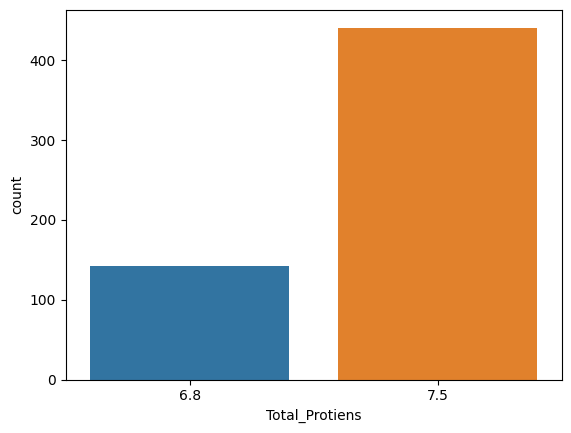

In [ ]:
sns.countplot(data['Total_Protiens'], x = data['Gender'])

<Axes: >

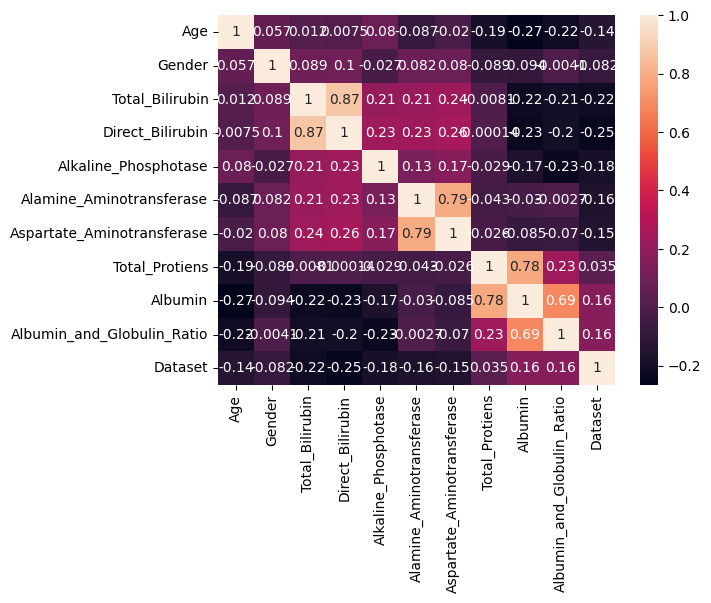

In [ ]:
df = data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']]
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import scale
X= data
X_scaled = pd.DataFrame (scale(X), columns= X.columns)

In [ ]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025,-0.633595
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777,-0.633595
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447,-0.633595
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194,-0.633595
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124,-0.633595


In [ ]:
X=data.iloc[:,:-1]
y=data.Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 


In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [ ]:
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

1    329
2    329
Name: Dataset, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train_smote, y_train_smote)
y_predict = model1.predict(X_test)
rfc1=accuracy_score(y_test, y_predict)
rfc1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        30

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



In [ ]:
acc_smote = [['RandomForestClassifier', rfc1]]
Liverpatient_pred=pd.DataFrame(acc_smote, columns = ['Classification models', 'accuracy_score'])
Liverpatient_pred

,Classification models,accuracy_score
0,RandomForestClassifier,1.0


<Axes: title={'center': 'Classification models & accuracy score after SMOTE'}, xlabel='Classification models', ylabel='accuracy_score'>

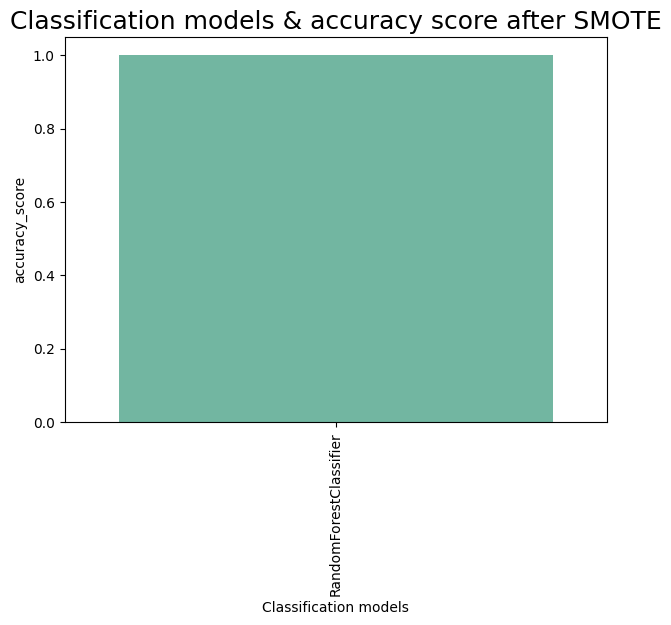

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy score after SMOTE', fontsize=18)
sns.barplot(x="Classification models", y="accuracy_score",data=Liverpatient_pred, palette="Set2")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.11777117, 0.02645932, 0.11215644, 0.103584  , 0.11695258,
       0.11107897, 0.11545029, 0.09372862, 0.10488599, 0.09793263])

In [ ]:
dd=pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0,ascending=False)
dd

,0
Age,0.117771
Alkaline_Phosphotase,0.116953
Aspartate_Aminotransferase,0.115450
Total_Bilirubin,0.112156
Alamine_Aminotransferase,0.111079
Albumin,0.104886
Direct_Bilirubin,0.103584
Albumin_and_Globulin_Ratio,0.097933
Total_Protiens,0.093729
Gender,0.026459


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

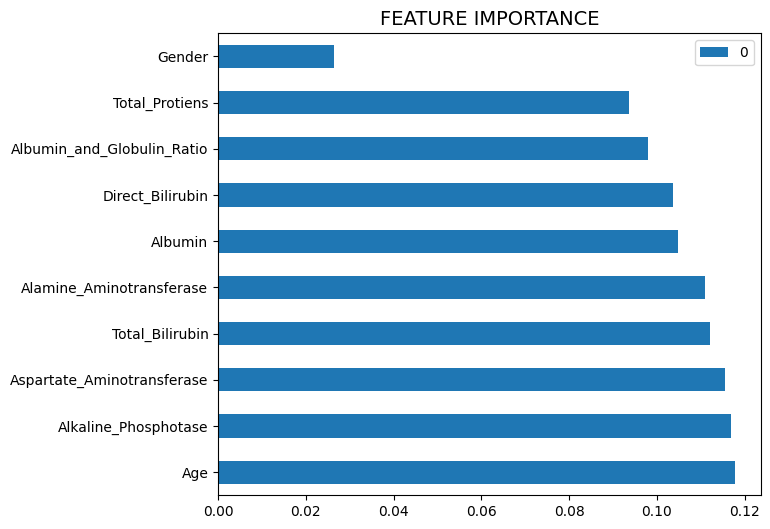

In [ ]:
dd.plot(kind='barh', figsize=(7,6))
plt.title("FEATURE IMPORTANCE", fontsize=14)

In [ ]:
import joblib
joblib.dump(model1, 'ETC.pk1')

['ETC.pk1']